In [1]:
import pandas as pd
import librosa
from python_speech_features import mfcc
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os

In [2]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip install python_speech_features
!pip install librosa

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5877 sha256=4d8498113332cd401c6f88b81348eca2878d239bc774e5c806f1b34d2b028652
  Stored in directory: c:\users\manoj\appdata\local\pip\cache\wheels\60\90\3c\4b5996a95d363fa14525597a19146a940bec467b44b2a14580
Successfully built python_speech_features
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--

In [3]:
dataset_path = "source_test"

In [4]:
def get_mel_spect(file_path, n_fft=1024, hop_length=512):
    signal, sampling_rate = librosa.load(file_path, sr=None)
    mel_spect = librosa.feature.melspectrogram(
        y=signal, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length
    )
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    return mel_spect

In [5]:
def get_mfcc(file_path, n_fft=1024, hop_length=512):
    signal, sampling_rate = librosa.load(file_path, sr=None)
    mel_spect = librosa.feature.melspectrogram(
        y=signal, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length
    )
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    return mel_spect

In [6]:
def load_sample(file_path):
    """
    Loads a sound sample without doing any processing.
    """
    signal, _ = librosa.load(file_path, sr=None)
    return signal

In [7]:
def process_data(dataset_path, output_path, processing_func, **kwargs):
    """
    Processes all `.wav` files in `dataset_path` and saves
    them as `.npy` files in `output_path`.
    `kwargs` are passed to `processing_func`
    """
    for root, _, files in os.walk(dataset_path):
        print(f'root: {root}')
        for file in tqdm(files):
            if file.endswith(".wav"):  # excluding hidden files
                # process the audio file
                file_path = os.path.join(root, file)
                processed_file = processing_func(file_path, **kwargs)

                # save the audio file
                processed_file_root = os.path.join(
                    output_path,
                    root.split(os.path.commonprefix([root, dataset_path]))[1],
                )
                processed_file_path = os.path.join(
                    processed_file_root, os.path.splitext(file)[0]
                )
                os.makedirs(processed_file_root, exist_ok=True)
                np.save(processed_file_path, processed_file)

In [8]:
processed_dataset_path = "./Additional_Dataset_Processed"

In [9]:
process_data(dataset_path, processed_dataset_path, get_mel_spect)

root: source_test


100%|██████████| 762/762 [00:21<00:00, 36.21it/s]


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\manoj\AppData\Local\Temp\ipykernel_12900\3446452939.py:3: SyntaxWarning: invalid escape sequence '\s'
  np.load('Additional_Dataset_Processed\section_02_source_test_normal_0045.npy'),


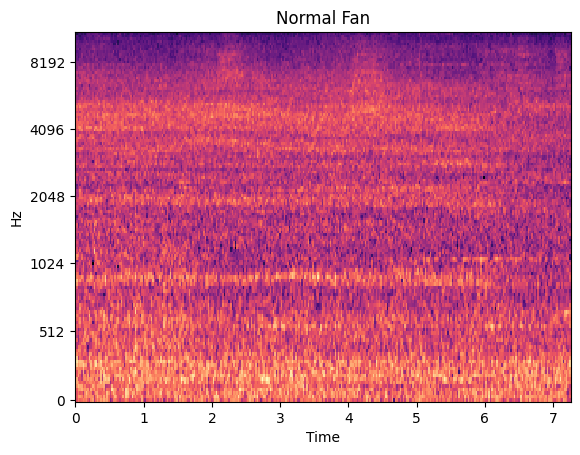

In [ ]:
# plotting a single audio signal sample
librosa.display.specshow(
    np.load('Additional_Dataset_Processed\section_02_source_test_normal_0045.npy'),
    x_axis="time",
    y_axis="mel",
)
plt.title('Normal Motor')
plt.show()

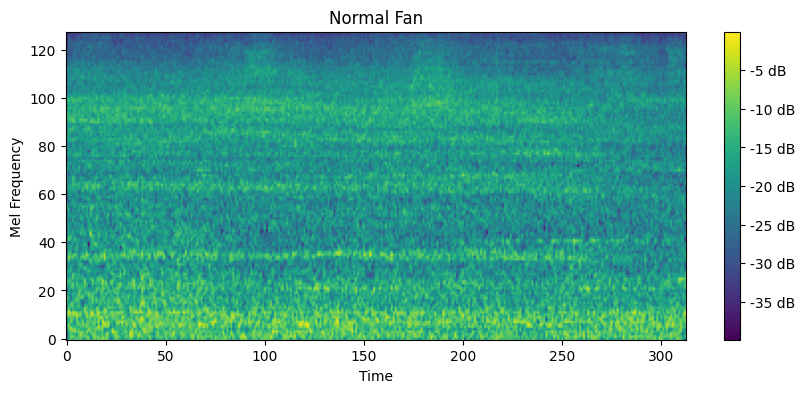

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load the processed Mel spectrogram
mel_spectrogram = np.load('Additional_Dataset_Processed\\section_02_source_test_normal_0045.npy')

# Plot using Matplotlib's imshow
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Normal Fan')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.show()

In [23]:
np.load('Additional_Dataset_Processed\section_02_source_test_normal_0045.npy').shape

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\manoj\AppData\Local\Temp\ipykernel_12900\638363791.py:1: SyntaxWarning: invalid escape sequence '\s'
  np.load('Additional_Dataset_Processed\section_02_source_test_normal_0045.npy').shape


(128, 313)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\manoj\AppData\Local\Temp\ipykernel_8016\1424406399.py:3: SyntaxWarning: invalid escape sequence '\s'
  np.load('Additional_Dataset_Processed\section_01_source_test_anomaly_0047.npy'),


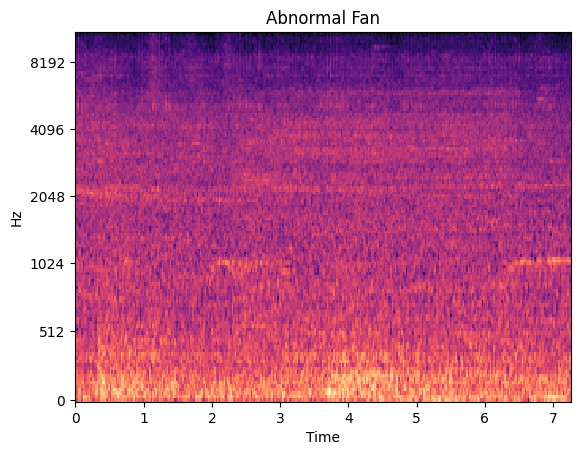

In [ ]:
# plotting a single audio signal sample
librosa.display.specshow(
    np.load('Additional_Dataset_Processed\section_01_source_test_anomaly_0047.npy'),
    x_axis="time",
    y_axis="mel",
)
plt.title("Abnormal Motor")
plt.show()

In [25]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class AudioDataset(Dataset):
    def __init__(self, data_dir):
        """
        Args:
            data_dir (str): Path to the directory containing .npy files.
        """
        self.data_dir = data_dir
        self.file_paths = []
        self.labels = []

        # Iterate through the files in the directory
        for file_name in os.listdir(data_dir):
            if file_name.endswith(".npy"):
                self.file_paths.append(os.path.join(data_dir, file_name))
                # Assign label based on the file name
                if "normal" in file_name:
                    self.labels.append(0)  # Normal
                elif "anomaly" in file_name:
                    self.labels.append(1)  # Abnormal

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        # Load the .npy file
        file_path = self.file_paths[idx]
        data = np.load(file_path)

        # Convert to PyTorch tensor
        x = torch.tensor(data, dtype=torch.float32)

        # Get the label
        y = torch.tensor(self.labels[idx], dtype=torch.long)

        return x, y

# Define the dataset directory
data_dir = "Additional_Dataset_Processed"

# Create the dataset
dataset = AudioDataset(data_dir)

# Create a DataLoader for batching
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Example: Iterate through the DataLoader
for batch_idx, (x, y) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}")
    print(f"Input shape: {x.shape}")  # Shape of the input tensor
    print(f"Labels: {y}")  # Corresponding labels
    break  # Remove this to iterate through the entire dataset

Batch 1
Input shape: torch.Size([16, 128, 313])
Labels: tensor([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader

# Define the Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        shortcut = self.shortcut(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += shortcut
        x = self.relu(x)
        return x

# Define the Deep CNN Model
# Define the Deep CNN Model with Dropout
class DeepCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(DeepCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3)  # Dropout added here
        )
        self.layer2 = ResidualBlock(64, 128, stride=2)
        self.layer3 = ResidualBlock(128, 256, stride=2)
        self.layer4 = ResidualBlock(256, 512, stride=2)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),  # Dropout added here
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the model and move it to the GPU
model = DeepCNN(num_classes=2).to(device)

# Define the optimizer, loss function, and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)  # Reduce LR by 10x every 10 epochs

# Training loop with accuracy calculation and CUDA support
def train_model(model, dataloader, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(dataloader):
            # Move data to GPU
            inputs, labels = inputs.unsqueeze(1).to(device), labels.to(device)  # Add channel dimension
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update loss
            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Step the scheduler
        scheduler.step()

        # Print epoch statistics
        epoch_loss = running_loss / len(dataloader)
        epoch_accuracy = 100 * correct / total
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Example usage with DataLoader
# Assuming `dataloader` is already defined
# train_model(model, dataloader)

Using device: cuda


In [27]:
# Define the dataset directory
data_dir = "Additional_Dataset_Processed"  # Update this path if necessary

# Create the dataset
dataset = AudioDataset(data_dir)

# Create a DataLoader for batching
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Start training
train_model(model, dataloader, num_epochs=20)

Epoch [1/20], Loss: 0.7397, Accuracy: 52.76%
Epoch [2/20], Loss: 0.6385, Accuracy: 66.14%
Epoch [3/20], Loss: 0.5354, Accuracy: 72.18%
Epoch [4/20], Loss: 0.4919, Accuracy: 77.17%
Epoch [5/20], Loss: 0.4045, Accuracy: 82.81%
Epoch [6/20], Loss: 0.3628, Accuracy: 83.86%
Epoch [7/20], Loss: 0.3752, Accuracy: 81.76%
Epoch [8/20], Loss: 0.3561, Accuracy: 83.60%
Epoch [9/20], Loss: 0.3365, Accuracy: 84.38%
Epoch [10/20], Loss: 0.2811, Accuracy: 86.75%
Epoch [11/20], Loss: 0.2197, Accuracy: 91.21%
Epoch [12/20], Loss: 0.1959, Accuracy: 92.78%
Epoch [13/20], Loss: 0.1993, Accuracy: 92.13%
Epoch [14/20], Loss: 0.2034, Accuracy: 92.39%
Epoch [15/20], Loss: 0.1822, Accuracy: 93.57%
Epoch [16/20], Loss: 0.1783, Accuracy: 92.39%
Epoch [17/20], Loss: 0.1628, Accuracy: 93.44%
Epoch [18/20], Loss: 0.1739, Accuracy: 93.18%
Epoch [19/20], Loss: 0.1707, Accuracy: 93.31%
Epoch [20/20], Loss: 0.1512, Accuracy: 94.62%


Epoch [1/10], Train Loss: 0.6980, Train Accuracy: 55.83%, Test Accuracy: 53.59%
Epoch [2/10], Train Loss: 0.7050, Train Accuracy: 58.62%, Test Accuracy: 48.37%
Epoch [3/10], Train Loss: 0.6701, Train Accuracy: 59.11%, Test Accuracy: 59.48%
Epoch [4/10], Train Loss: 0.6439, Train Accuracy: 66.17%, Test Accuracy: 71.24%
Epoch [5/10], Train Loss: 0.5751, Train Accuracy: 72.41%, Test Accuracy: 75.82%
Epoch [6/10], Train Loss: 0.5170, Train Accuracy: 76.19%, Test Accuracy: 60.78%
Epoch [7/10], Train Loss: 0.4977, Train Accuracy: 77.34%, Test Accuracy: 43.14%
Epoch [8/10], Train Loss: 0.4922, Train Accuracy: 77.18%, Test Accuracy: 81.05%
Epoch [9/10], Train Loss: 0.4219, Train Accuracy: 80.95%, Test Accuracy: 59.48%
Epoch [10/10], Train Loss: 0.3876, Train Accuracy: 81.61%, Test Accuracy: 74.51%


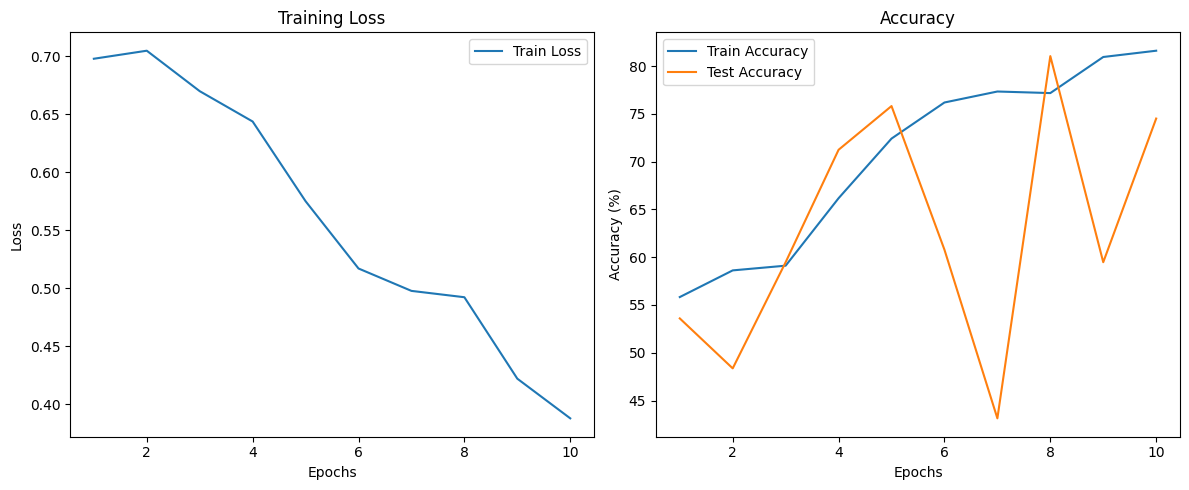

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
def split_dataset(dataset, test_size=0.2):
    train_indices, test_indices = train_test_split(range(len(dataset)), test_size=test_size, random_state=42)
    train_dataset = torch.utils.data.Subset(dataset, train_indices)
    test_dataset = torch.utils.data.Subset(dataset, test_indices)
    return train_dataset, test_dataset

# Split the dataset
train_dataset, test_dataset = split_dataset(dataset, test_size=0.2)

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Training and evaluation function
def train_and_evaluate(model, train_loader, test_loader, num_epochs=20):
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.unsqueeze(1).to(device), labels.to(device)  # Add channel dimension
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluation phase
        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.unsqueeze(1).to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_accuracies.append(test_accuracy)

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

    return train_losses, train_accuracies, test_accuracies

# Train and evaluate the model
train_losses, train_accuracies, test_accuracies = train_and_evaluate(model, train_loader, test_loader, num_epochs=10)

# Plot loss and accuracy
def plot_metrics(train_losses, train_accuracies, test_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Train Accuracy")
    plt.plot(epochs, test_accuracies, label="Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(train_losses, train_accuracies, test_accuracies)